In [1]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [2]:
G = nx.barabasi_albert_graph(2000, 2)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 949
Number of deinfluenced nodes: 0
Number of susceptible nodes: 1051
influencer {1281, 517, 1541, 650, 141, 1038, 1041, 275, 20, 277, 404, 1309, 927, 1441, 163, 807, 1064, 169, 1196, 943, 304, 306, 563, 820, 566, 1847, 826, 61, 447, 1864, 1995, 1868, 974, 975, 1876, 212, 1750, 1879, 1366, 1502, 1379, 1767, 1257, 368, 1010, 1143, 1400, 1274, 1403, 509}


In [4]:
# Run simulation for different values of k
budget_list = list(range(1, 201, 5))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'Degree': set()}), (6, {'Random': {267}, 'Degree': {53}}), (11, {'Random': {1641, 651, 1773, 1358}, 'Degree': {38}}), (16, {'Random': {1065, 178, 1643, 1789}, 'Degree': {8}}), (21, {'Random': {1154, 1058, 1508, 1610, 1041, 1969, 1942, 539}, 'Degree': {16}}), (26, {'Random': {1056, 901, 1496, 1295, 597, 279, 408}, 'Degree': {33}}), (31, {'Random': {906, 1419, 1292, 1067, 1006, 623, 1239, 1144, 922, 1661, 1182}, 'Degree': {80, 130}}), (36, {'Random': {1376, 100, 432, 1235, 1781, 1913, 1340}, 'Degree': {31}}), (41, {'Random': {640, 1889, 1860, 1000, 617, 604, 1582, 1071, 1942, 1782, 1722, 476, 1597, 1663}, 'Degree': {20}}), (46, {'Random': {1408, 1346, 1247, 1316, 1756, 1927, 1961, 810, 1451, 1449, 938, 462, 537, 1660, 413, 1375}, 'Degree': {5}}), (51, {'Random': {1376, 1730, 386, 1559, 1350, 1352, 1769, 1642, 907, 1866, 1995, 786, 1811, 1117, 1079, 1463, 311}, 'Degree': {9, 130}}), (56, {'Random': {1345, 1474, 840, 72, 1897, 683, 1582, 144, 1746, 1651, 1044, 787, 7

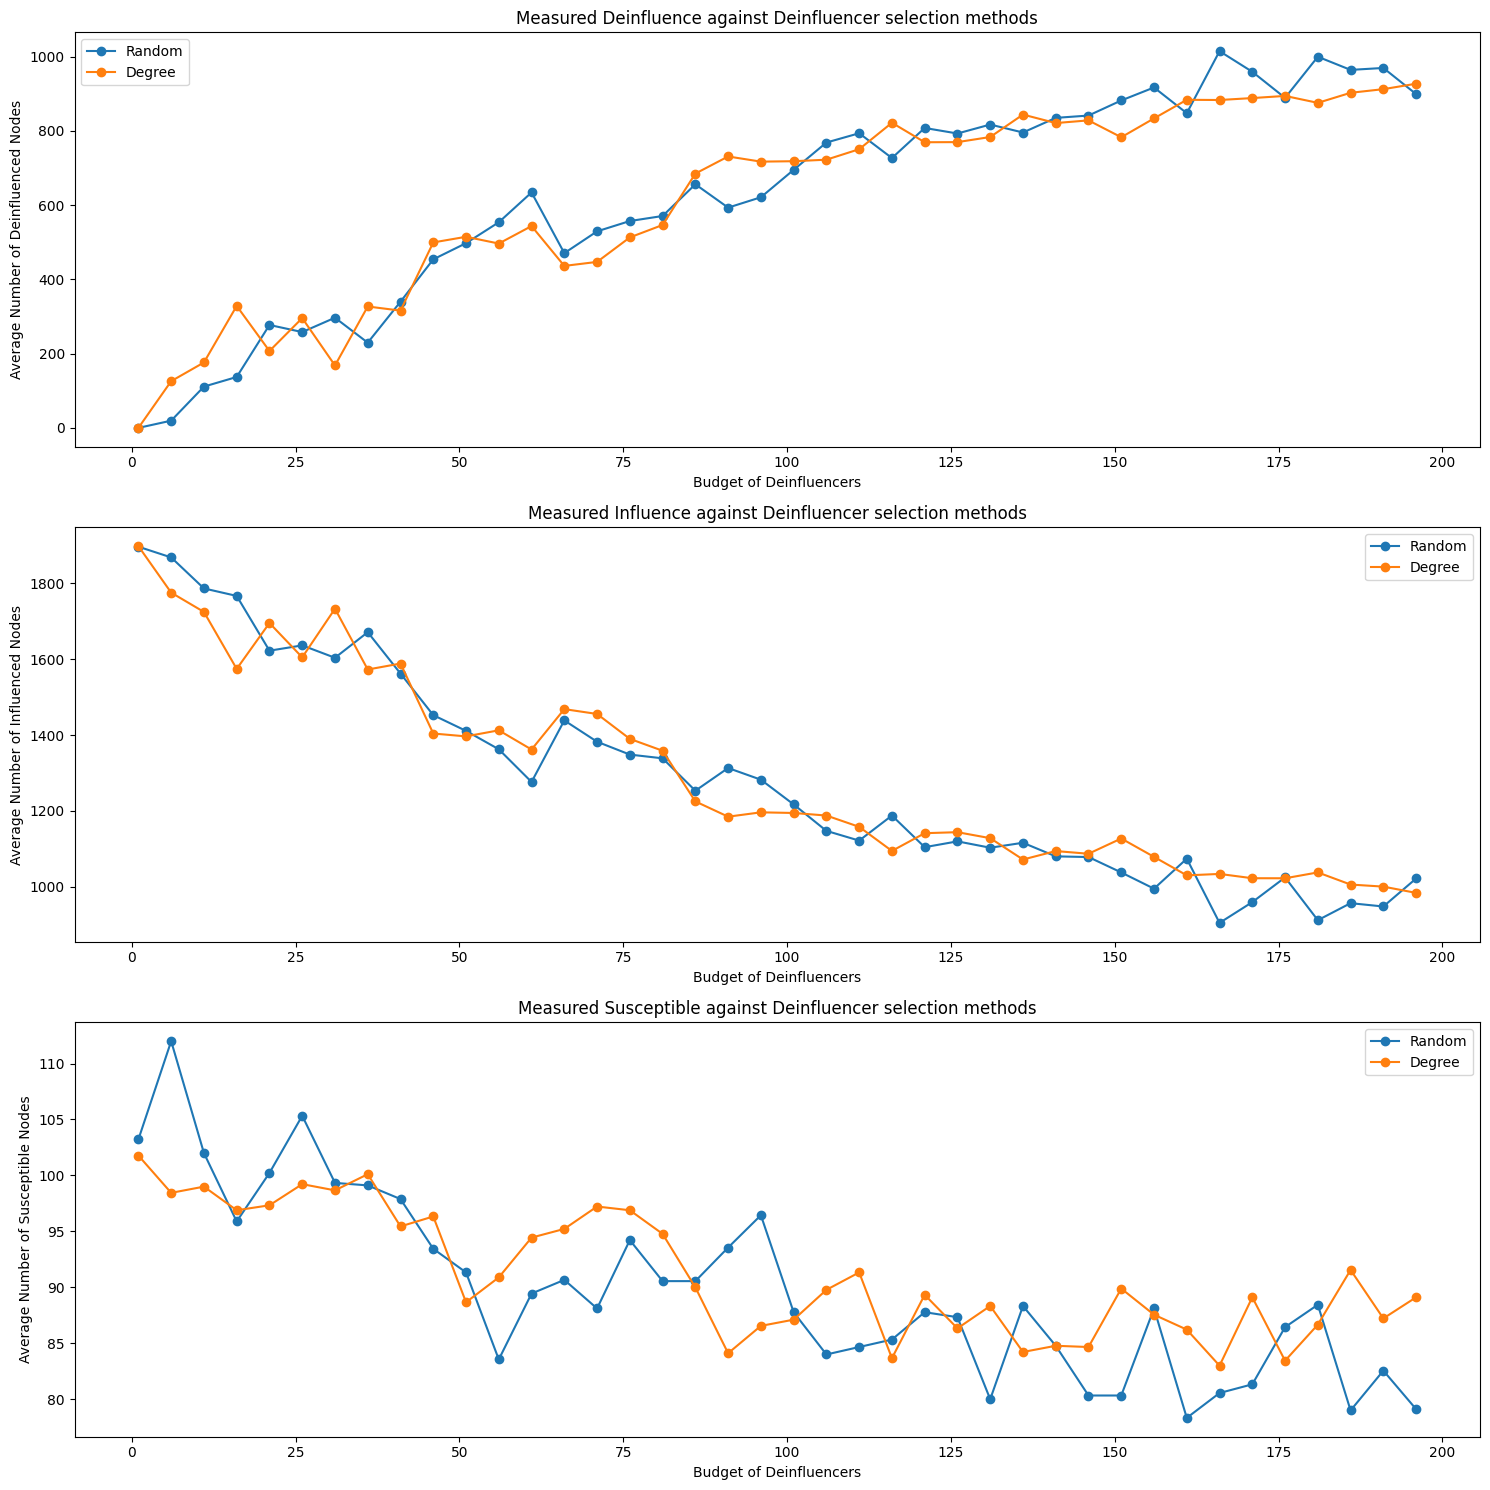

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()